In [10]:
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('transformed_data.csv')

cat_col = ['home','marital','records', 'job']
num_col = ['seniority', 'time', 'age', 'expenses', 
            'income', 'assets', 'debt', 'amount', 'price']

In [12]:
full_train_df, full_test_df = train_test_split(df, test_size =0.2, random_state=11)
full_train_df, full_val_df = train_test_split(full_train_df, test_size = 0.25, random_state=11)

train_df = full_train_df.reset_index(drop = True)
test_df = full_test_df.reset_index(drop = True)
val_df = full_val_df.reset_index(drop = True)

y_train = (train_df['status'] == 'default').astype('int')
y_test = (test_df['status'] == 'default').astype('int')
y_val = (val_df['status'] == 'default').astype('int')

dv = DictVectorizer(sparse = False)
dv.fit(train_df[cat_col + num_col].to_dict(orient = 'records'))
feature_names = dv.get_feature_names()

X_train = dv.transform(train_df[cat_col + num_col].to_dict(orient = 'records'))
X_test = dv.transform(test_df[cat_col + num_col].to_dict(orient = 'records'))
X_val = dv.transform(val_df[cat_col + num_col].to_dict(orient = 'records'))


del train_df['status']
del test_df['status']
del val_df['status']

In [13]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, pred)
print(auc)

0.8126954597708254


In [15]:
scores = []

for n in range (10,200,10):
        model = RandomForestClassifier(n_estimators=n, random_state=1)
        model.fit(X_train, y_train)
        pred = model.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, pred)
        scores.append([n,auc])
        
        print('n_trees == %4s    Validation data == %.3f' % (n,auc))
        print()

n_trees ==   10    Validation data == 0.788

n_trees ==   20    Validation data == 0.803

n_trees ==   30    Validation data == 0.813

n_trees ==   40    Validation data == 0.818

n_trees ==   50    Validation data == 0.820

n_trees ==   60    Validation data == 0.822

n_trees ==   70    Validation data == 0.823

n_trees ==   80    Validation data == 0.823

n_trees ==   90    Validation data == 0.822

n_trees ==  100    Validation data == 0.822

n_trees ==  110    Validation data == 0.822

n_trees ==  120    Validation data == 0.823

n_trees ==  130    Validation data == 0.824

n_trees ==  140    Validation data == 0.824

n_trees ==  150    Validation data == 0.824

n_trees ==  160    Validation data == 0.823

n_trees ==  170    Validation data == 0.824

n_trees ==  180    Validation data == 0.824

n_trees ==  190    Validation data == 0.825



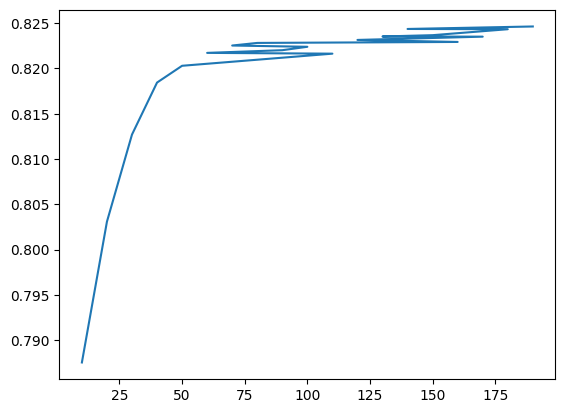

In [18]:
output = pd.DataFrame(scores, columns = ['no_estimators', 'auc_score'])
output = output.sort_values('auc_score', ascending= False).reset_index(drop= True)

plt.plot(output.no_estimators, output.auc_score)

In [21]:
scores = []

for i in range(2,50,3):
    for n in [30,40,50,60,70]:
        model = RandomForestClassifier(n_estimators=n, max_depth = i, random_state=1)
        model.fit(X_train, y_train)
        pred = model.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, pred)

        scores.append([i,n,auc])

output = pd.DataFrame(scores, columns = ['Depth', 'no_estimators', 'auc_score'])
output = output.sort_values('auc_score', ascending= False).reset_index(drop= True)
output.head()

,Depth,no_estimators,auc_score
0,11,70,0.829633
1,14,70,0.826731
2,11,60,0.826580
3,8,60,0.826568
4,8,70,0.826506


In [27]:
scores = []

max_depth = 11
for s in [3,5,10,50]:
    for n in range (10,200,10):
        model = RandomForestClassifier(n_estimators=n, max_depth = max_depth, min_samples_leaf=s, random_state=1)
        model.fit(X_train, y_train)
        pred = model.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, pred)

        scores.append([s,n,auc])

output = pd.DataFrame(scores, columns = ['no_leaves', 'no_estimators', 'auc_score'])
output = output.sort_values('auc_score', ascending= False).reset_index(drop= True)
output.head()

,no_leaves,no_estimators,auc_score
0,5,170,0.836382
1,5,160,0.836339
2,3,190,0.836030
3,5,140,0.835678
4,5,190,0.835567


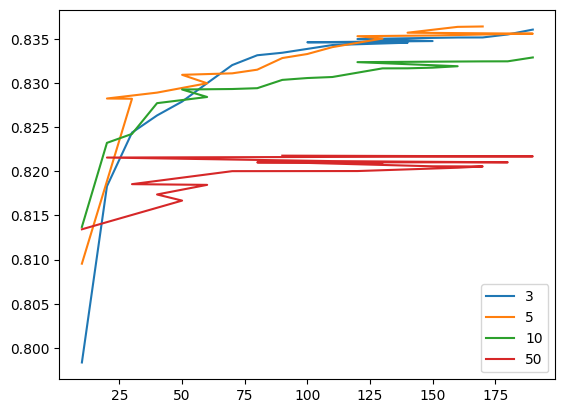

In [28]:
depths = [3,5,10,50]
for i in depths:
    data = output[output['no_leaves'] == i]
    plt.plot(data.no_estimators, data.auc_score, label = str(i))

plt.legend()

In [30]:
model = RandomForestClassifier(n_estimators=60, max_depth = 11, min_samples_leaf=3, random_state=1)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, pred)
print(auc)

0.8299669958837562
